# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import plotly.express  as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation


# Ingest Data  

In [2]:
df=pd.read_excel("World military power.xlsx",header=[0,1])

# EDA

In [3]:
df.head()

2020 ranking                               Airforce Strength                                                                                                                                                                                                                                                                                                                                                                                                                 Land Strength                                                                                                                                                                                                                                                                Navy Strength                                                                                                                                                                                                                                          \
  Military Strength Military Strength Power Index Aircraft Strength Aircraft Strength value Fighter/Interceptor Strength Fighter/Interceptor Strength value Attack Aircraft Strength Attack Aircraft Strength value Transport Aircraft Fleet Strength Transport Aircraft Fleet Strength value Trainer Aircraft Fleet Trainer Aircraft Fleet value Helicopter Fleet Strength Helicopter Fleet Strength value Attack Helicopter Fleet Strength Attack Helicopter Fleet Strength value Tank Strength Tank Strength value AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength Self-Propelled Artillery Strength value Towed Artillery Strength Towed Artillery Strength value Rocket Projector Strength Rocket Projector Strength value Navy Fleet Strengths Navy Fleet Strengths value Aircraft Carrier Fleet Strength Aircraft Carrier Fleet Strength value Submarine Fleet Strength Submarine Fleet Strength value Destroyer Fleet Strength Destroyer Fleet Strength value Frigate Fleet Strength   
0       Afghanistan                        1.3444       Afghanistan                   260.0                  Afghanistan                                0.0              Afghanistan                           25.0                       Afghanistan                                    30.0            Afghanistan                          0.0               Afghanistan                           187.0                      Afghanistan                                    0.0   Afghanistan                 0.0      Afghanistan                 1062.0                       Afghanistan                                     0.0              Afghanistan                          176.0               Afghanistan                            50.0          Afghanistan                        0.0                     Afghanistan                                   0.0              Afghanistan                            0.0              Afghanistan                            0.0            Afghanistan   
1           Albania                        2.3137           Albania                    19.0                      Albania                                0.0                  Albania                            0.0                           Albania                                     0.0                Albania                          0.0                   Albania                            19.0                          Albania                                    0.0       Albania                 0.0          Albania                  467.0                           Albania                                     0.0                  Albania                            0.0                   Albania                             0.0              Albania                       38.0                         Albania                                   0.0                  Albania                            0.0                  Albania                            0.0                Albania   
2           Algeria                        0.4659           Alg

In [4]:
df.shape

(138, 60)

## Implement basic steps to see how is your data looks like

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

## Convert multi index columns to one level

In [6]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

In [7]:
df.head()

,2020 ranking Military Strength,2020 ranking Military Strength Power Index,Airforce Strength Aircraft Strength,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength,Land Strength Tank Strength value,Land Strength AFV/APC Strength,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength,Navy Strength Frigate Fleet Strength value,Finances defense spending budget,Finances defense spending budget value,Finances External Debt,Finances External Debt value,Logistics Airport Totals,Logistics Airport Totals value,Natural resources Oil Production,Natural resources Oil Production value,Natural resources Oil Consumption,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves,Natural resources Proven Oil Reserves value,Manpower Available Manpower,Manpower Available Manpower value,Manpower Total Population,Manpower Total Population value,Geography Total Square Land Area,Geography Total Square Land Area value,Geography Total Coastline Coverage,Geography Total Coastline Coverage value,Geography Total Waterway Coverage,Geography Total Waterway Coverage value,Geography Total Border Coverage,Geography Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angol

In [8]:
df.columns

Index(['2020 ranking Military Strength', '2020 ranking Military Strength Power Index', 'Airforce Strength Aircraft Strength', 'Airforce Strength Aircraft Strength value', 'Airforce Strength Fighter/Interceptor Strength', 'Airforce Strength Fighter/Interceptor Strength value', 'Airforce Strength Attack Aircraft Strength', 'Airforce Strength Attack Aircraft Strength value', 'Airforce Strength Transport Aircraft Fleet Strength', 'Airforce Strength Transport Aircraft Fleet Strength value', 'Airforce Strength Trainer Aircraft Fleet', 'Airforce Strength Trainer Aircraft Fleet value', 'Airforce Strength Helicopter Fleet Strength', 'Airforce Strength Helicopter Fleet Strength value', 'Airforce Strength Attack Helicopter Fleet Strength', 'Airforce Strength Attack Helicopter Fleet Strength value', 'Land Strength Tank Strength', 'Land Strength Tank Strength value', 'Land Strength AFV/APC Strength', 'Land Strength AFV/APC Strength value', 'Land Strength Self-Propelled Artillery Strength',
       '

## Detect and drop duplicated columns

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated().any()

False

In [11]:
# len(df[df.duplicated()])

## Check for missing values 

In [12]:
# to see null value for each columns
df.isnull().sum().sort_values(ascending=False)

Geography Total Coastline Coverage value                     29
Geography Total Coastline Coverage                           29
Navy Strength Submarine Fleet Strength                       23
Navy Strength Frigate Fleet Strength value                   23
Navy Strength Frigate Fleet Strength                         23
Navy Strength Destroyer Fleet Strength value                 23
Navy Strength Destroyer Fleet Strength                       23
Navy Strength Submarine Fleet Strength value                 23
Navy Strength Aircraft Carrier Fleet Strength value          23
Navy Strength Aircraft Carrier Fleet Strength                23
Navy Strength Navy Fleet Strengths                           14
Navy Strength Navy Fleet Strengths value                     14
Geography Total Border Coverage                               9
Geography Total Border Coverage value                         9
Airforce Strength Attack Helicopter Fleet Strength            0
Manpower Available Manpower             

In [13]:
# to see percentile of missing value for each column
df.isnull().sum().sort_values(ascending=False)/len(df)

Geography Total Coastline Coverage value                     0.210145
Geography Total Coastline Coverage                           0.210145
Navy Strength Submarine Fleet Strength                       0.166667
Navy Strength Frigate Fleet Strength value                   0.166667
Navy Strength Frigate Fleet Strength                         0.166667
Navy Strength Destroyer Fleet Strength value                 0.166667
Navy Strength Destroyer Fleet Strength                       0.166667
Navy Strength Submarine Fleet Strength value                 0.166667
Navy Strength Aircraft Carrier Fleet Strength value          0.166667
Navy Strength Aircraft Carrier Fleet Strength                0.166667
Navy Strength Navy Fleet Strengths                           0.101449
Navy Strength Navy Fleet Strengths value                     0.101449
Geography Total Border Coverage                              0.065217
Geography Total Border Coverage value                        0.065217
Airforce Strength At

<AxesSubplot:>

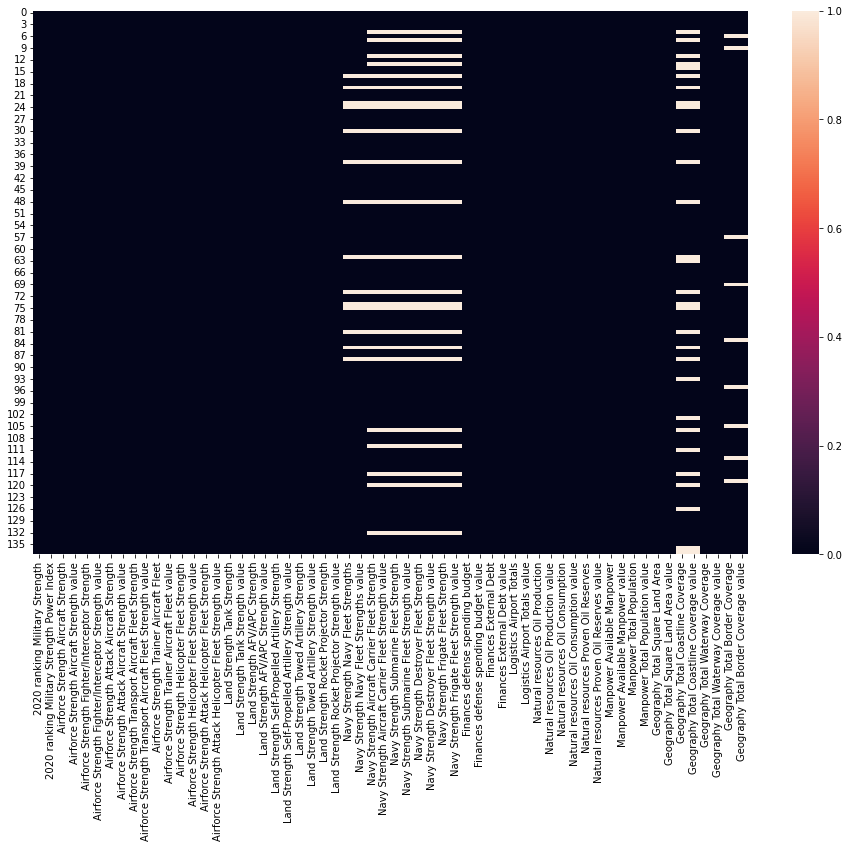

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In my analysis, I saw that some columns' empty values ​​should be filled with the name of that country, so it is necessary to create a new column with the name of the country or to get those values ​​from another column.

In [15]:
cols = [col for col in df.columns if 'value' in col]
cols

['Airforce Strength Aircraft Strength value',
 'Airforce Strength Fighter/Interceptor Strength value',
 'Airforce Strength Attack Aircraft Strength value',
 'Airforce Strength Transport Aircraft Fleet Strength value',
 'Airforce Strength Trainer Aircraft Fleet value',
 'Airforce Strength Helicopter Fleet Strength value',
 'Airforce Strength Attack Helicopter Fleet Strength value',
 'Land Strength Tank Strength value',
 'Land Strength AFV/APC Strength value',
 'Land Strength Self-Propelled Artillery Strength value',
 'Land Strength Towed Artillery Strength value',
 'Land Strength Rocket Projector Strength value',
 'Navy Strength Navy Fleet Strengths value',
 'Navy Strength Aircraft Carrier Fleet Strength value',
 'Navy Strength Submarine Fleet Strength value',
 'Navy Strength Destroyer Fleet Strength value',
 'Navy Strength Frigate Fleet Strength value',
 'Finances defense spending budget value',
 'Finances External Debt value',
 'Logistics Airport Totals value',
 'Natural resources Oil

In [16]:
# so we create a  country column 

df_2 = df[cols].copy()
df_2["Country"]= [i for i in df["2020 ranking Military Strength"]]

In [17]:
df_2["Military Strength Power Index"] =  [i for i in df["2020 ranking Military Strength Power Index"]]

In [18]:
# columns order
df_2 = df_2[ ["Country"] + [ col for col in df_2.columns if col != 'Country' ] ]

In [19]:
df_2.head()

,Country,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Finances defense spending budget value,Finances External Debt value,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value,Military Strength Power Index
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0,1.3444
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0,2.3137
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0,0.4659
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0,0.8379
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0,0.6521


In [20]:
def missing_zero_values_table(df_2):
        zero_val = (df_2 == 0.00).astype(int).sum(axis=0)
        mis_val = df_2.isnull().sum()
        mis_val_percent = 100 * df_2.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df_2)
        mz_table['Data Type'] = df_2.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df_2.shape[1]) + " columns and " + str(df_2.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df_2)

Your selected dataframe has 31 columns and 138 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Geography Total Coastline Coverage value,1,29,21.0,30,21.7,object
Navy Strength Aircraft Carrier Fleet Strength value,102,23,16.7,125,90.6,float64
Navy Strength Submarine Fleet Strength value,74,23,16.7,97,70.3,float64
Navy Strength Destroyer Fleet Strength value,103,23,16.7,126,91.3,float64
Navy Strength Frigate Fleet Strength value,61,23,16.7,84,60.9,float64
Navy Strength Navy Fleet Strengths value,14,14,10.1,28,20.3,float64
Geography Total Border Coverage value,0,9,6.5,9,6.5,float64


In [21]:
df_2.head()

,Country,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Finances defense spending budget value,Finances External Debt value,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value,Military Strength Power Index
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0,1.3444
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0,2.3137
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0,0.4659
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0,0.8379
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0,0.6521


In [22]:
df_2

,Country,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Finances defense spending budget value,Finances External Debt value,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value,Military Strength Power Index
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0,1.3444
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0,2.3137
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0,0.4659
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0,0.8379
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0,0.6521
5,Armenia,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0,2.1251
6,Australia,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN,0.3225
7,Austria,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0,0.9568
8,Azerbaijan,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,"2,80,50,00,000","17,41,00,00,000",37.0,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.0,713.0,0.0,2468.0,0.9463
9,Bahrain,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN,1.8547


In [23]:
df_2.loc[df["Geography Total Coastline Coverage value"].isnull(), ['Country',
                                                                             'Navy Strength Navy Fleet Strengths value',
                                                                             'Navy Strength Aircraft Carrier Fleet Strength value',
                                                                             'Navy Strength Submarine Fleet Strength value',
                                                                             'Navy Strength Destroyer Fleet Strength value',
                                                                             'Navy Strength Frigate Fleet Strength value',
                                                                             'Geography Total Waterway Coverage value']]

,Country,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Geography Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0.0
7,Austria,0.0,NaN,NaN,NaN,NaN,0.0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,0.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800.0
24,Chad,NaN,NaN,NaN,NaN,NaN,0.0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664.0


In [24]:
df_2.loc[df["Geography Total Coastline Coverage value"].isnull(),
    
    ['Navy Strength Navy Fleet Strengths value',
     'Navy Strength Aircraft Carrier Fleet Strength value',
     'Navy Strength Submarine Fleet Strength value',
     'Navy Strength Destroyer Fleet Strength value',
     'Navy Strength Frigate Fleet Strength value']
    
    ] = 0

In [25]:
df_2.loc[df['Navy Strength Aircraft Carrier Fleet Strength value'].isnull()|
             df['Navy Strength Submarine Fleet Strength value'].isnull()|
             df['Navy Strength Destroyer Fleet Strength value'].isnull()|
             df['Navy Strength Frigate Fleet Strength value'].isnull()] 

,Country,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Finances defense spending budget value,Finances External Debt value,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value,Military Strength Power Index
5,Armenia,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0,2.1251
7,Austria,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0,0.9568
11,Belarus,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,0.0,0.0,0.0,0.0,"62,37,02,800","39,92,00,00,000",65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0,0.8179
13,Bhutan,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,51,20,000","2,67,10,00,000",2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0,10.1681
16,Botswana,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,"45,00,00,000","2,18,70,00,000",74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0,2.0582
19,Burkina Faso,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"13,00,00,000","3,05,60,00,000",23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0,1.9009
23,Central African Republic,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,00,00,000","77,99,00,000",39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0,3.2889
24,Chad,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,372.0,10.0,51.0,10.0,0.0,0.0,0.0,0.0,0.0,"20,00,00,000","1,72,40,00,000",59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0,1.6383
30,Czechia,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,682.0,86.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,96,90,00,000","2,05,20,00,00,000",128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0,0.5531
38,Ethiopia,86.0,24.0,0.0,9.0,20.0,33.0,8.0,400.0,114.0,67.0,650.0,183.0,0.0,0.0,0.0,0.0,0.0,"35,00,00,000","26,05,00,00,000",57.0,0.0,55000.0,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.0,0.8581


In [26]:
df_2.loc[df_2["Country"]=="Uzbekistan",
                ['Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]]
                

,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value
132,0.0,NaN,NaN,NaN,NaN


In [27]:
df_2.loc[df_2["Country"] == "Uzbekistan",
            ['Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]] = 0

In [28]:
df_2.loc[df_2["Country"] == "South Korea",
            ['Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]] 

,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value
110,234.0,NaN,NaN,NaN,NaN


In [29]:
df_2.loc[((df_2['Navy Strength Navy Fleet Strengths value'] > 200) & 
             (df_2['Navy Strength Navy Fleet Strengths value'] < 250)),
            ['Country',
             'Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]] 

,Country,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value
2,Algeria,201.0,0.0,6.0,0.0,5.0
39,Finland,246.0,0.0,0.0,0.0,0.0
55,Italy,249.0,2.0,8.0,4.0,12.0
110,South Korea,234.0,NaN,NaN,NaN,NaN


In [30]:
# South Korea Navy wikipeida page

df_2.loc[df_2["Country"] == "South Korea",'Navy Strength Aircraft Carrier Fleet Strength value'] = 2
df_2.loc[df_2["Country"] == "South Korea",'Navy Strength Submarine Fleet Strength value'] = 19
df_2.loc[df_2["Country"] == "South Korea",'Navy Strength Destroyer Fleet Strength value'] = 12
df_2.loc[df_2["Country"] == "South Korea",'Navy Strength Frigate Fleet Strength value'] = 12

In [31]:
df_2.loc[df['Geography Total Coastline Coverage value'].isnull()]

,Country,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Finances defense spending budget value,Finances External Debt value,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value,Military Strength Power Index
5,Armenia,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0,2.1251
7,Austria,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0,0.9568
11,Belarus,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,0.0,0.0,0.0,0.0,"62,37,02,800","39,92,00,00,000",65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0,0.8179
13,Bhutan,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,51,20,000","2,67,10,00,000",2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0,10.1681
14,Bolivia,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,137.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0,0.9942
16,Botswana,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,"45,00,00,000","2,18,70,00,000",74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0,2.0582
19,Burkina Faso,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"13,00,00,000","3,05,60,00,000",23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0,1.9009
23,Central African Republic,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,00,00,000","77,99,00,000",39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0,3.2889
24,Chad,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,372.0,10.0,51.0,10.0,0.0,0.0,0.0,0.0,0.0,"20,00,00,000","1,72,40,00,000",59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0,1.6383
30,Czechia,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,682.0,86.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,96,90,00,000","2,05,20,00,00,000",128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0,0.5531


In [32]:
df_2.loc[df['Geography Total Coastline Coverage value'].isnull(), 
          'Geography Total Coastline Coverage value']  = 0 

In [33]:
df_2.loc[df['Geography Total Border Coverage value'].isnull(), 
          'Geography Total Border Coverage value' ] = 0

In [34]:
df_2.isnull().sum().any()

False

## Fix the dtypes

In [35]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   Airforce Strength Aircraft Strength value                  138 non-null    float64
 2   Airforce Strength Fighter/Interceptor Strength value       138 non-null    float64
 3   Airforce Strength Attack Aircraft Strength value           138 non-null    float64
 4   Airforce Strength Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Airforce Strength Trainer Aircraft Fleet value             138 non-null    float64
 6   Airforce Strength Helicopter Fleet Strength value          138 non-null    float64
 7   Airforce Strength Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Land Stren

In [36]:
# we have to remove comma to fix column
df_2.select_dtypes("object")

,Country,Finances defense spending budget value,Finances External Debt value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
5,Armenia,"1,38,50,00,000","10,41,00,00,000",0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,0,0.0
6,Australia,"26,30,00,00,000","17,14,00,00,00,000","2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0
7,Austria,"3,38,00,00,000","6,30,80,00,00,000",14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,0,0.0
8,Azerbaijan,"2,80,50,00,000","17,41,00,00,000","7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.0,713.0,0.0
9,Bahrain,"1,41,50,00,000","52,15,00,00,000",45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0


In [37]:
# we fixed columns

df_2 = df_2.apply(lambda x: x.replace(',','',regex=True), axis=1)

In [38]:
df_2

,Country,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,Land Strength AFV/APC Strength value,Land Strength Self-Propelled Artillery Strength value,Land Strength Towed Artillery Strength value,Land Strength Rocket Projector Strength value,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Finances defense spending budget value,Finances External Debt value,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value,Military Strength Power Index
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0,1.3444
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0,2.3137
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0,0.4659
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0,0.8379
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0,0.6521
5,Armenia,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,1385000000,10410000000,11.0,0.0,47500.0,0.0,1696085,3038217,29743.0,0,0.0,1570.0,2.1251
6,Australia,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480.0,263000,1005000,1821000000,10808002,23470145,7741220,25760.0,2000.0,0.0,0.3225
7,Austria,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3380000000,630800000000,52.0,14260.0,215000,43000000,4017691,8793370,83871.0,0,0.0,2524.0,0.9568
8,Azerbaijan,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37.0,789300,180000,7000000000,5042346,10046516,86600.0,713.0,0.0,2468.0,0.9463
9,Bahrain,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,1415000000,52150000000,4.0,45000.0,55000.0,124600000,806505,1422659,760.0,161.0,0.0,0.0,1.8547


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [39]:
df_2.columns

Index(['Country', 'Airforce Strength Aircraft Strength value', 'Airforce Strength Fighter/Interceptor Strength value', 'Airforce Strength Attack Aircraft Strength value', 'Airforce Strength Transport Aircraft Fleet Strength value', 'Airforce Strength Trainer Aircraft Fleet value', 'Airforce Strength Helicopter Fleet Strength value', 'Airforce Strength Attack Helicopter Fleet Strength value', 'Land Strength Tank Strength value', 'Land Strength AFV/APC Strength value', 'Land Strength Self-Propelled Artillery Strength value', 'Land Strength Towed Artillery Strength value', 'Land Strength Rocket Projector Strength value', 'Navy Strength Navy Fleet Strengths value', 'Navy Strength Aircraft Carrier Fleet Strength value', 'Navy Strength Submarine Fleet Strength value', 'Navy Strength Destroyer Fleet Strength value', 'Navy Strength Frigate Fleet Strength value', 'Finances defense spending budget value', 'Finances External Debt value', 'Logistics Airport Totals value',
       'Natural resources

In [40]:
df_2.drop(['Geography Total Square Land Area value',
               'Geography Total Coastline Coverage value',
               'Geography Total Waterway Coverage value',
               'Geography Total Border Coverage value'],axis=1,inplace=True)

## Visualy inspect the some features

In [41]:
df_2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Airforce Strength Aircraft Strength value,260.0,19.0,551.0,295.0,227.0,64.0,464.0,120.0,147.0,109.0,177.0,202.0,148.0,2.0,69.0,19.0,45.0,715.0,63.0,16.0,22.0,29.0,385.0,3.0,35.0,282.0,3210.0,469.0,78.0,80.0,95.0,53.0,113.0,49.0,108.0,1054.0,51.0,7.0,86.0,194.0,1229.0,23.0,66.0,712.0,24.0,566.0,33.0,46.0,47.0,2123.0,462.0,509.0,348.0,19.0,589.0,860.0,8.0,1561.0,278.0,222.0,150.0,85.0,5.0,33.0,5.0,70.0,0.0,114.0,10.0,6.0,170.0,29.0,28.0,484.0,3.0,9.0,9.0,214.0,16.0,276.0,30.0,16.0,168.0,48.0,19.0,16.0,129.0,949.0,20.0,150.0,131.0,1372.0,39.0,33.0,273.0,171.0,457.0,90.0,123.0,13.0,143.0,4163.0,879.0,109.0,5.0,235.0,47.0,38.0,0.0,226.0,1649.0,19.0,512.0,77.0,190.0,3.0,204.0,169.0,456.0,744.0,25.0,34.0,570.0,147.0,1055.0,72.0,48.0,297.0,538.0,733.0,13264.0,50.0,185.0,260.0,293.0,169.0,108.0,90.0
Airforce Strength Fighter/Interceptor Strength value,0.0,0.0,103.0,72.0,24.0,0.0,82.0,15.0,17.0,17.0,44.0,39.0,43.0,0.0,0.0,0.0,10.0,43.0,13.0,0.0,0.0,0.0,62.0,0.0,0.0,44.0,1232.0,21.0,12.0,38.0,12.0,2.0,33.0,0.0,9.0,215.0,0.0,0.0,24.0,55.0,269.0,6.0,0.0,128.0,0.0,187.0,0.0,3.0,12.0,538.0,41.0,155.0,26.0,0.0,259.0,99.0,0.0,279.0,44.0,76.0,17.0,27.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,26.0,9.0,0.0,3.0,0.0,0.0,0.0,46.0,8.0,59.0,6.0,0.0,61.0,0.0,0.0,0.0,8.0,458.0,0.0,59.0,29.0,356.0,0.0,0.0,17.0,0.0,91.0,24.0,24.0,2.0,26.0,873.0,270.0,9.0,0.0,100.0,10.0,0.0,0.0,17.0,414.0,0.0,137.0,0.0,46.0,0.0,71.0,54.0,199.0,289.0,0.0,14.0,75.0,12.0,206.0,24.0,10.0,48.0,98.0,133.0,2085.0,0.0,66.0,38.0,77.0,77.0,18.0,10.0
Airforce Strength Attack Aircraft Strength value,25.0,0.0,22.0,18.0,7.0,9.0,6.0,0.0,12.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,78.0,4.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,371.0,38.0,0.0,0.0,16.0,4.0,0.0,8.0,0.0,88.0,15.0,0.0,0.0,0.0,0.0,0.0,10.0,74.0,0.0,0.0,4.0,9.0,0.0,172.0,39.0,23.0,33.0,0.0,18.0,110.0,0.0,12.0,4.0,39.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0,0.0,0.0,13.0,0.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,1.0,0.0,0.0,2.0,13.0,114.0,0.0,15.0,10.0,90.0,0.0,0.0,38.0,19.0,0.0,0.0,6.0,0.0,0.0,742.0,81.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,12.0,0.0,38.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,19.0,0.0,0.0,20.0,0.0,25.0,20.0,15.0,715.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0
Airforce Strength Transport Aircraft Fleet Strength value,30.0,0.0,59.0,30.0,9.0,3.0,38.0,11.0,1.0,2.0,11.0,4.0,1

https://plotly.com/python/plotly-express/

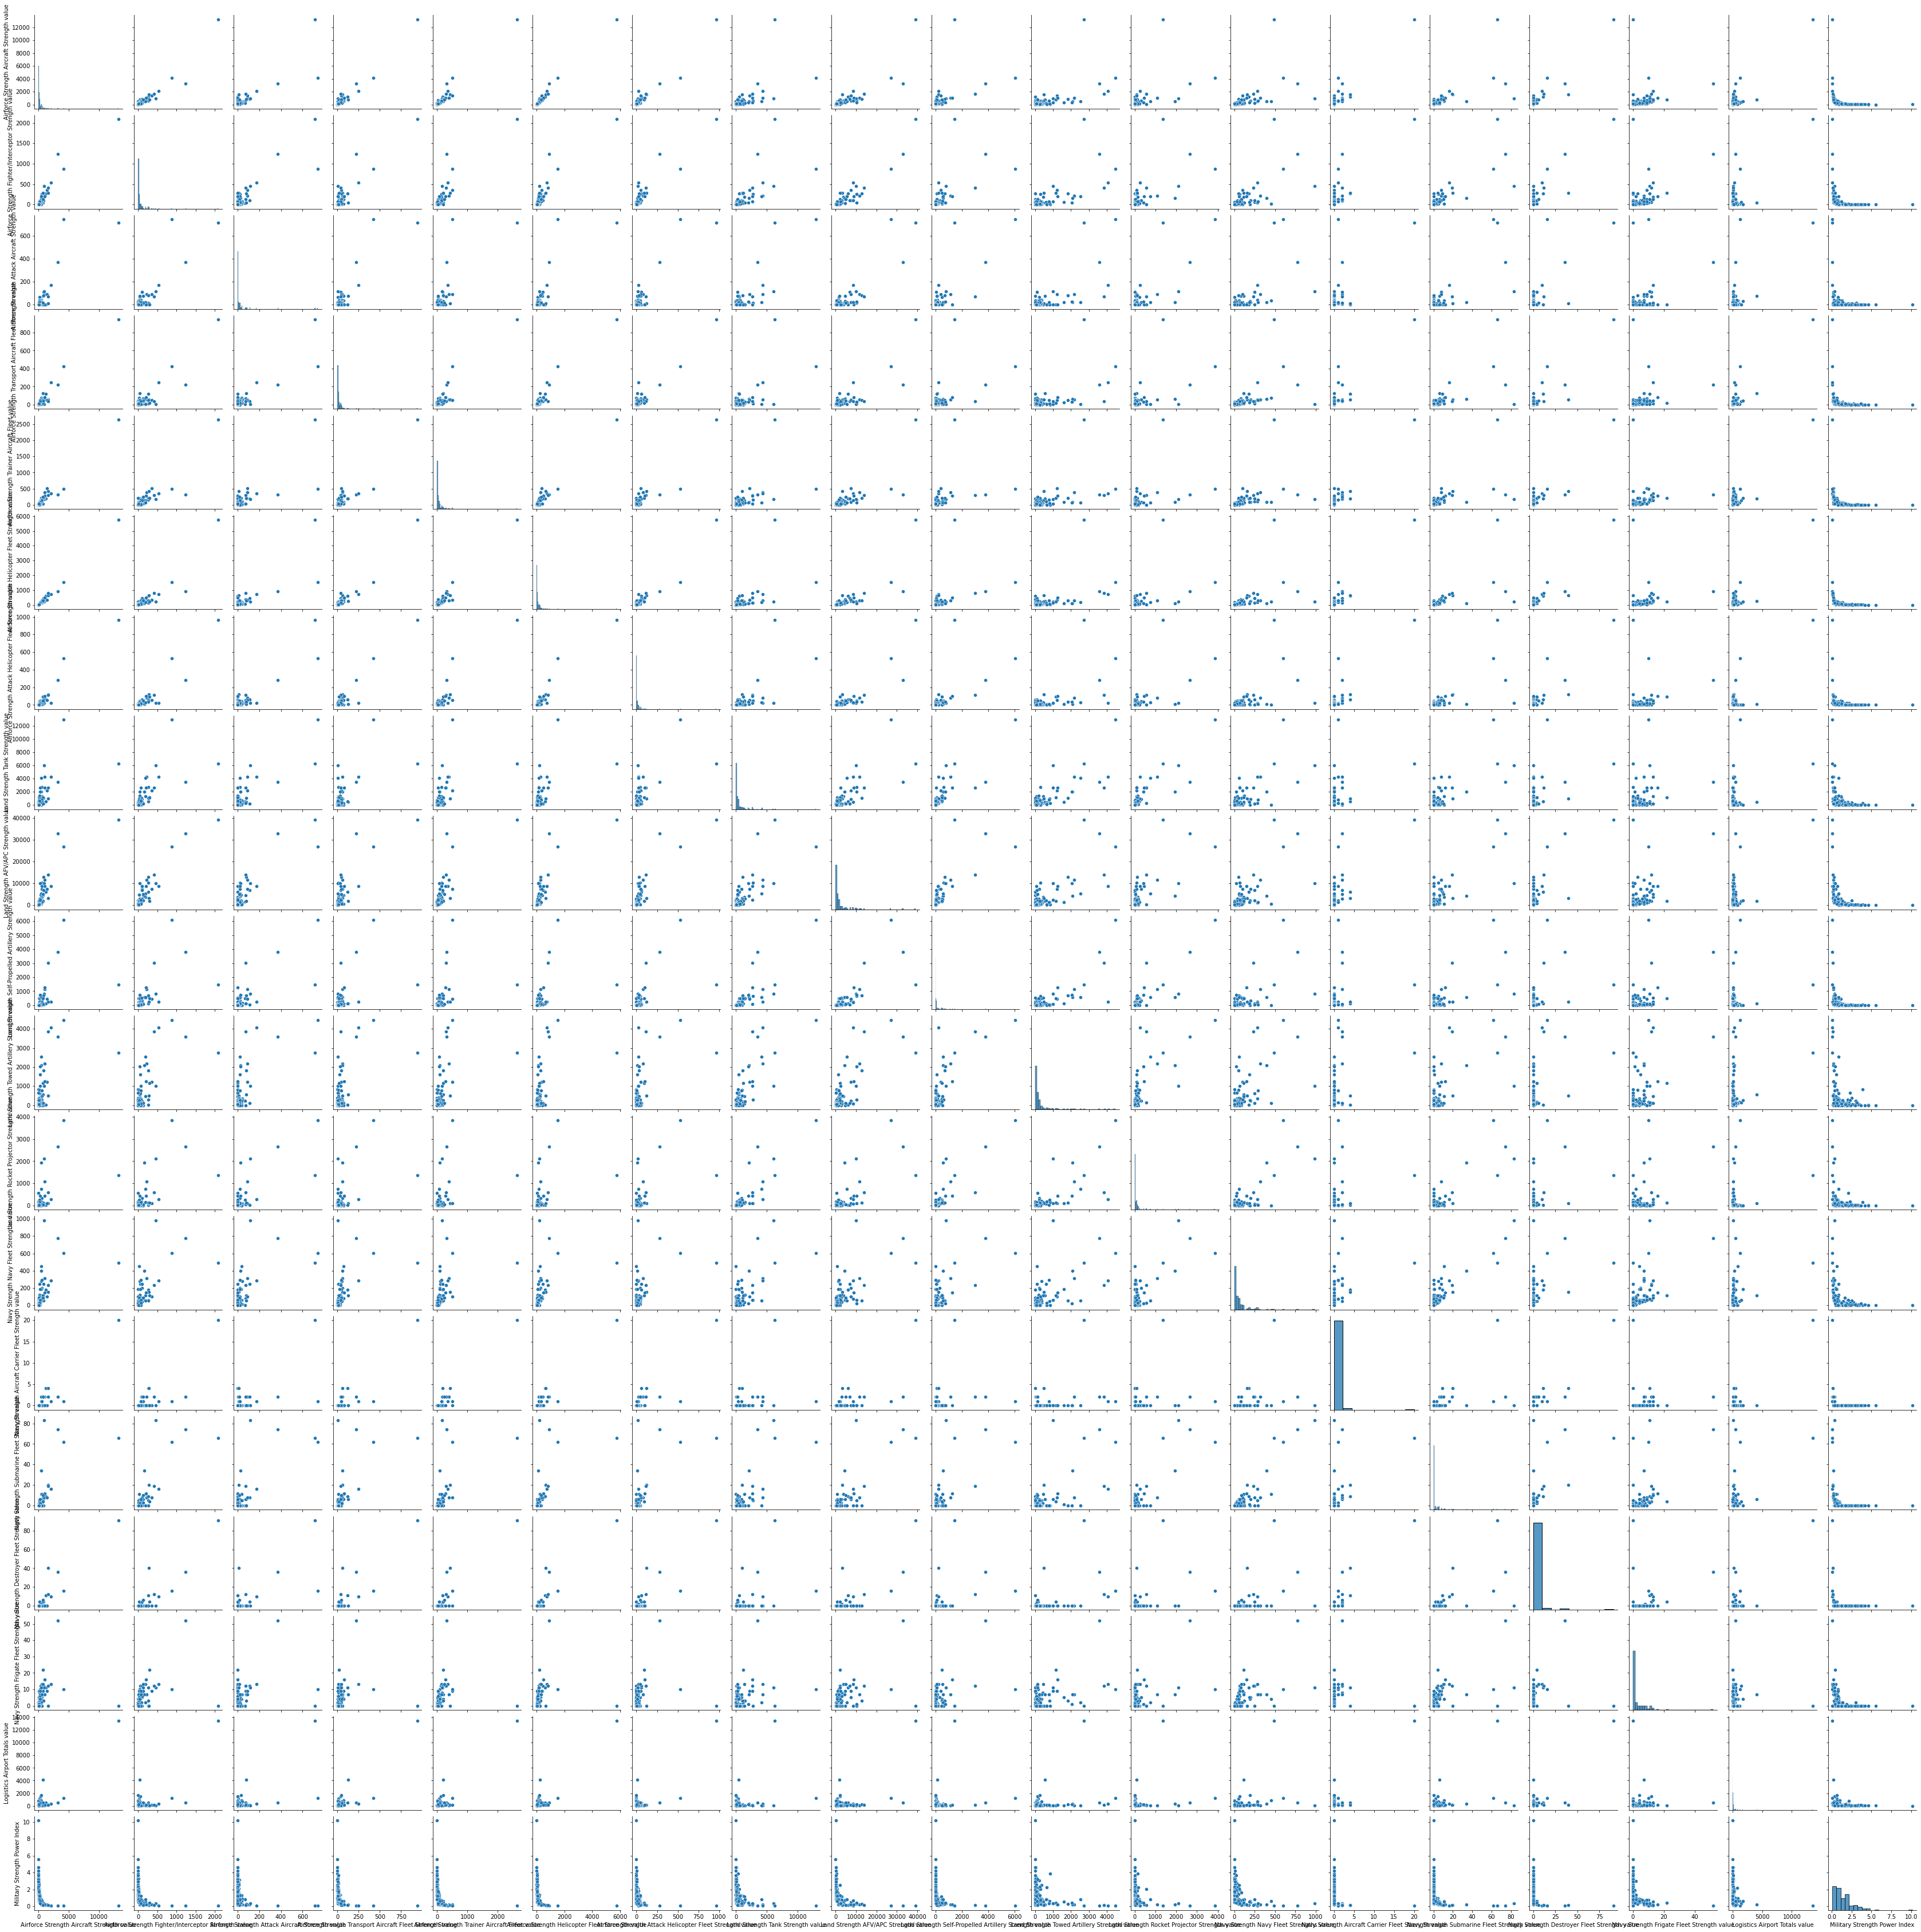

In [42]:
sns.pairplot(df_2)

In [43]:
fig = px.bar(df_2,x= "Country" , y = df_2["Airforce Strength Aircraft Strength value"])
fig.show()

In [44]:
fig = px.bar(df_2,x= "Country" , y = df_2["Navy Strength Navy Fleet Strengths value"])
fig.show()

In [45]:
fig = px.box(df_2, x="Airforce Strength Helicopter Fleet Strength value")
fig.show()

In [46]:
fig = px.bar(df_2,x= "Country" , y = df_2["Land Strength Towed Artillery Strength value"])
fig.show()

In [47]:
fig = px.box(df_2, x="Land Strength Towed Artillery Strength value")
fig.show()

In [48]:
fig = px.pie(df_2, values='Land Strength Tank Strength value', names='Country', title='Country Tank Strength Value')
fig.show()

## Decriptive statistics

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 ranking Military Strength Power Index,138.0,1.460716,1.324018,0.0606,0.5748,1.0341,2.021525,10.1681
Airforce Strength Aircraft Strength value,138.0,388.471014,1231.981859,0.0000,33.0000,111.0000,290.250000,13264.0000
Airforce Strength Fighter/Interceptor Strength value,138.0,81.565217,230.324777,0.0000,0.0000,17.0000,60.500000,2085.0000
Airforce Strength Attack Aircraft Strength value,138.0,25.760870,94.528222,0.0000,0.0000,0.0000,15.750000,742.0000
Airforce Strength Transport Aircraft Fleet Strength value,138.0,30.231884,92.330436,0.0000,3.0000,9.0000,26.000000,945.0000
Airforce Strength Trainer Aircraft Fleet value,138.0,82.833333,240.803721,0.0000,4.2500,26.0000,79.250000,2643.0000
Airforce Strength Helicopter Fleet Strength value,138.0,154.065217,520.183631,0.0000,15.2500,44.0000,126.750000,5768.0000
Airforce Strength Attack Helicopter Fleet Strength value,138.0,25.623188,97.326091,0.0000,0.0000,2.0000,17.750000,967.0000
Land Strength Tank Strength value,138.0,646.565217,1515.463683,0.0000,19.2500,153.0000,436.250000,12950.0000
Land Strength AFV/APC Strength value,138.0,2485.695652,5410.546392,0.0000,250.2500,734.5000,2000.000000,39253.0000


# Data Preprocessing

In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [56]:
X = df_2.drop(["Country"], axis=1)

In [57]:
scaler = StandardScaler()

# Modelling

In [58]:
X = scaler.fit_transform(X)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [60]:
from pyclustertend import hopkins

from pyclustertend import hopkins

In [61]:
hopkins(X, X.shape[0])

0.07432130830225368

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [62]:
ssd = []

K = range(2,10)                                          # k icin aralik.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)                                         # Her yeni k sayisina gore modeli egit.
    ssd.append(model.inertia_)

In [63]:
ssd

[1909.4825400661186,
 1294.9499703756715,
 1032.0768081318024,
 873.3447017521207,
 700.9826518601566,
 596.8408007852493,
 498.2157649891474,
 440.83886497770044]

Text(0.5, 1.0, 'elbow method')

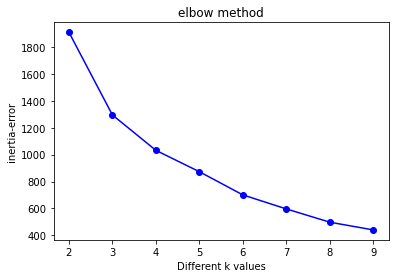

In [64]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

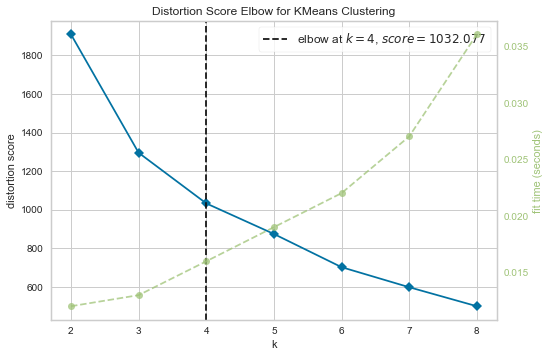

In [65]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [66]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [67]:
model.inertia_

1033.7812181068578

In [68]:
model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 2, 0,
       0, 0, 3, 0, 0, 0])

### Evaluate 

In [69]:
from sklearn.metrics import silhouette_score

In [70]:
silhouette_score(X, model.labels_)

0.5148224930536247

In [71]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8193950812093086
For n_clusters=4, the silhouette score is 0.4956608189413284
For n_clusters=5, the silhouette score is 0.5177311271740322
For n_clusters=6, the silhouette score is 0.48669858072616184
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.47714406079950733


## Hierarchical Clustering

In [72]:
from pyclustertend import hopkins

### Dendogram

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

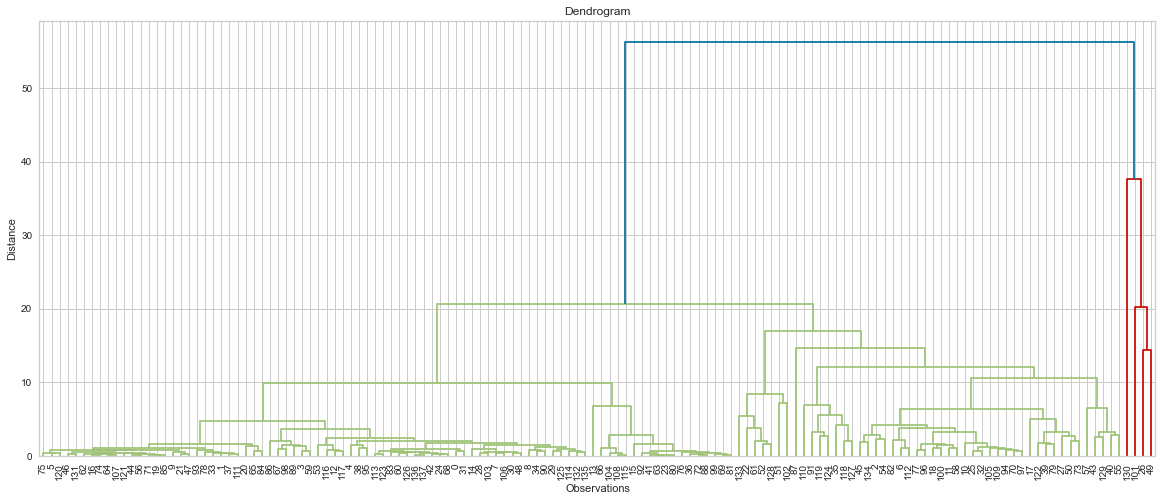

In [75]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

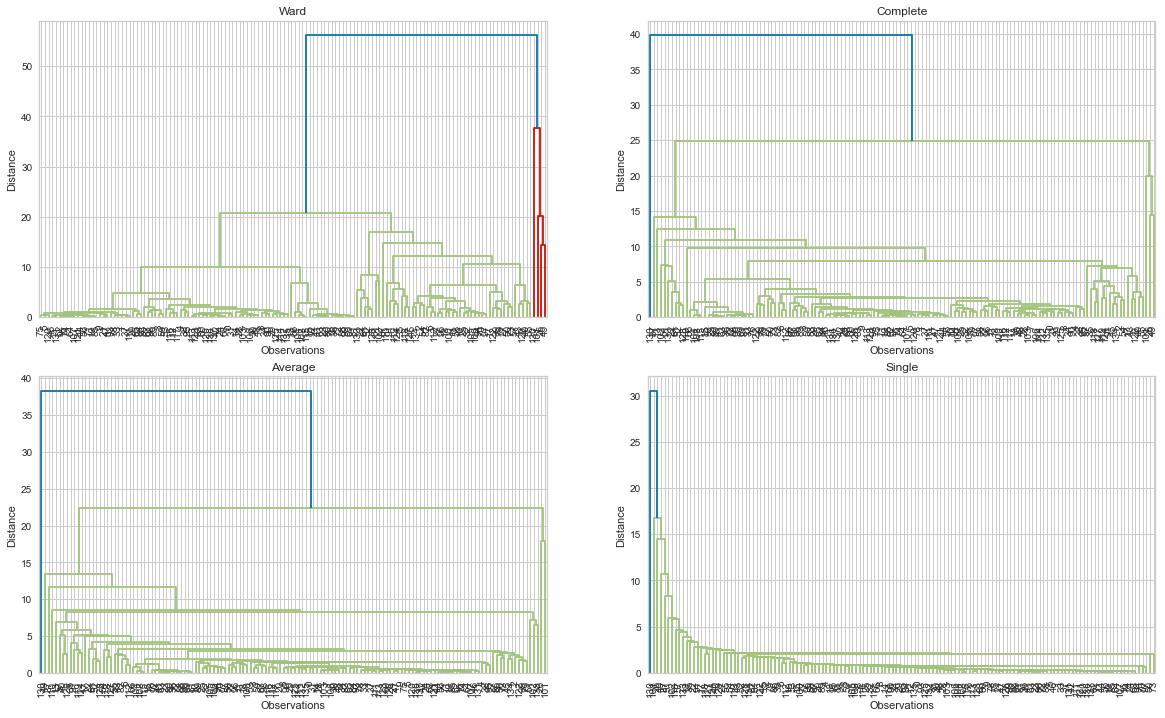

In [76]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

### Evaluate 

In [79]:
silhouette_score(X, model1.labels_)

0.3546913282067596